1. Importing  necessary libraries to perform EDA

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

2. Loading data into data frame

In [3]:
df = pd.read_csv('winequality-red.csv')

3. Dispalaying first 5 results

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


4. Checking data types

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

5. Dropping duplicated rows

5.1 First, we check how many rows and columns we have in our data

In [6]:
df.shape

(1599, 12)

5.2 Now we print out number of duplicated rows

In [7]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (240, 12)


In [9]:
df.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

5.3 We drop duplicated rows

In [10]:
df = df.drop_duplicates()

5.4 Now we check count without duplicated rows

In [11]:
df.count()

fixed acidity           1359
volatile acidity        1359
citric acid             1359
residual sugar          1359
chlorides               1359
free sulfur dioxide     1359
total sulfur dioxide    1359
density                 1359
pH                      1359
sulphates               1359
alcohol                 1359
quality                 1359
dtype: int64

6. Checking if we have any null values. If we have we need to drop them.

In [12]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


7. Detecting outliers and removing outliers

<AxesSubplot: xlabel='fixed acidity'>

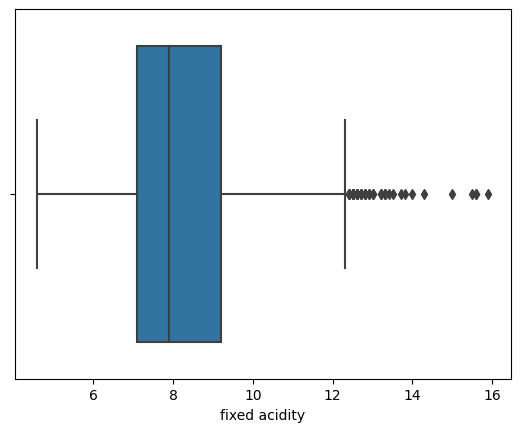

In [15]:
sns.boxplot(x=df['fixed acidity'])

<AxesSubplot: xlabel='total sulfur dioxide'>

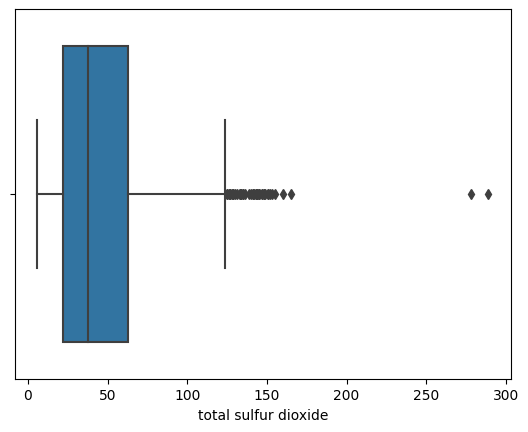

In [16]:
sns.boxplot(x=df['total sulfur dioxide'])

<AxesSubplot: xlabel='alcohol'>

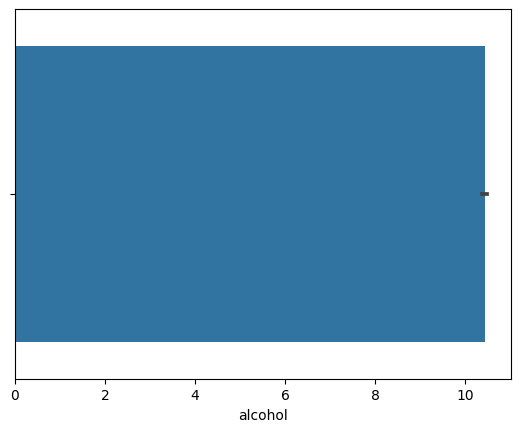

In [17]:
sns.barplot(x=df['alcohol'])

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            2.10000
volatile acidity         0.25000
citric acid              0.34000
residual sugar           0.70000
chlorides                0.02100
free sulfur dioxide     14.00000
total sulfur dioxide    41.00000
density                  0.00222
pH                       0.19000
sulphates                0.18000
alcohol                  1.60000
quality                  1.00000
dtype: float64


In [19]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(1005, 12)

7.Comparison of features

7.1 By ploting scatterplot we can see that there is no relationship between sulphates and pH

<AxesSubplot: xlabel='sulphates', ylabel='pH'>

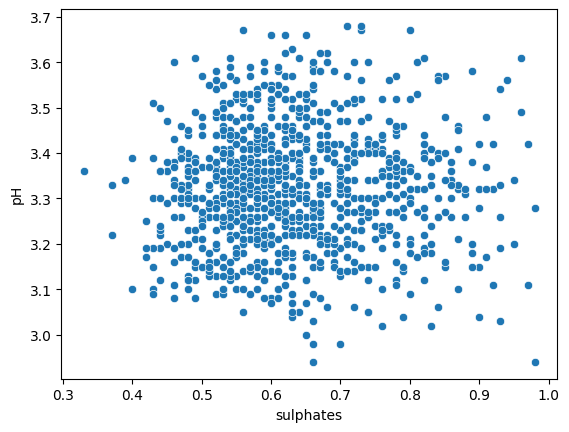

In [30]:
sns.scatterplot(x=df['sulphates'], y=df['pH'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.282019,0.655777,0.239487,0.202368,-0.144925,-0.087810,0.610015,-0.692128,0.185839,-0.025770,0.121315
volatile acidity,-0.282019,1.000000,-0.621121,0.021976,0.124282,-0.018433,0.099376,0.043580,0.241762,-0.308814,-0.222085,-0.348293
citric acid,0.655777,-0.621121,1.000000,0.155535,0.065903,-0.067158,0.011869,0.289552,-0.477620,0.270070,0.152067,0.220871
residual sugar,0.239487,0.021976,0.155535,1.000000,0.259101,0.085180,0.186835,0.396153,-0.073672,0.053014,0.091426,0.013534
chlorides,0.202368,0.124282,0.065903,0.259101,1.000000,0.026697,0.181407,0.424603,-0.184797,-0.069210,-0.291450,-0.183684
free sulfur dioxide,-0.144925,-0.018433,-0.067158,0.085180,0.026697,1.000000,0.623980,-0.012027,0.119040,0.089043,-0.050641,-0.015978
total sulfur dioxide,-0.087810,0.099376,0.011869,0.186835,0.181407,0.623980,1.000000,0.150321,-0.010152,-0.060509,-0.265482,-0.208359
density,0.610015,0.043580,0.289552,0.396153,0.424603,-0.012027,0.150321,1.000000,-0.241898,0.091304,-0.538401,-0.215042
pH,-0.692128,0.241762,-0.477620,-0.073672,-0.184797,0.119040,-0.010152,-0.241898,1.000000,0.005097,0.118311,-0.061311
sulphates,0.185839,-0.308814,0.270070,0.053014,-0.069210,0.089043,-0.060509,0.091304,0.005097,1.000000,0.268061,0.418719


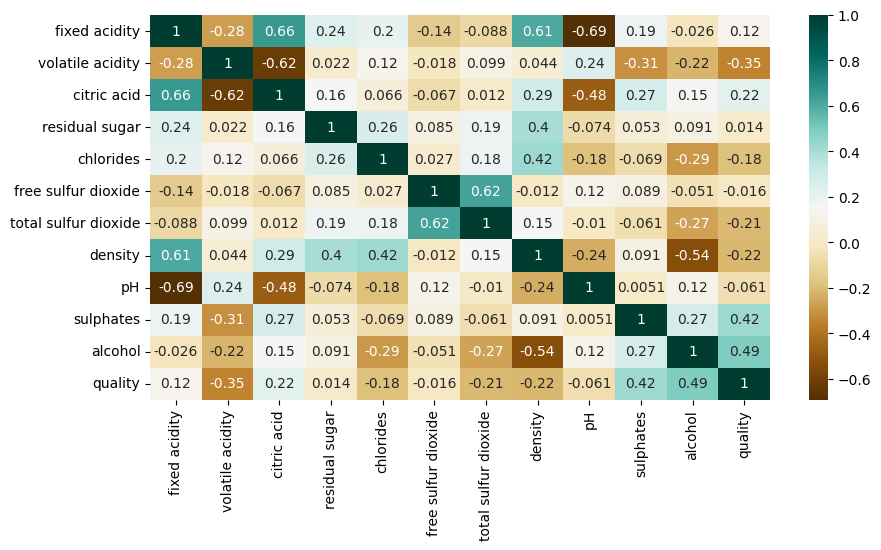

In [21]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

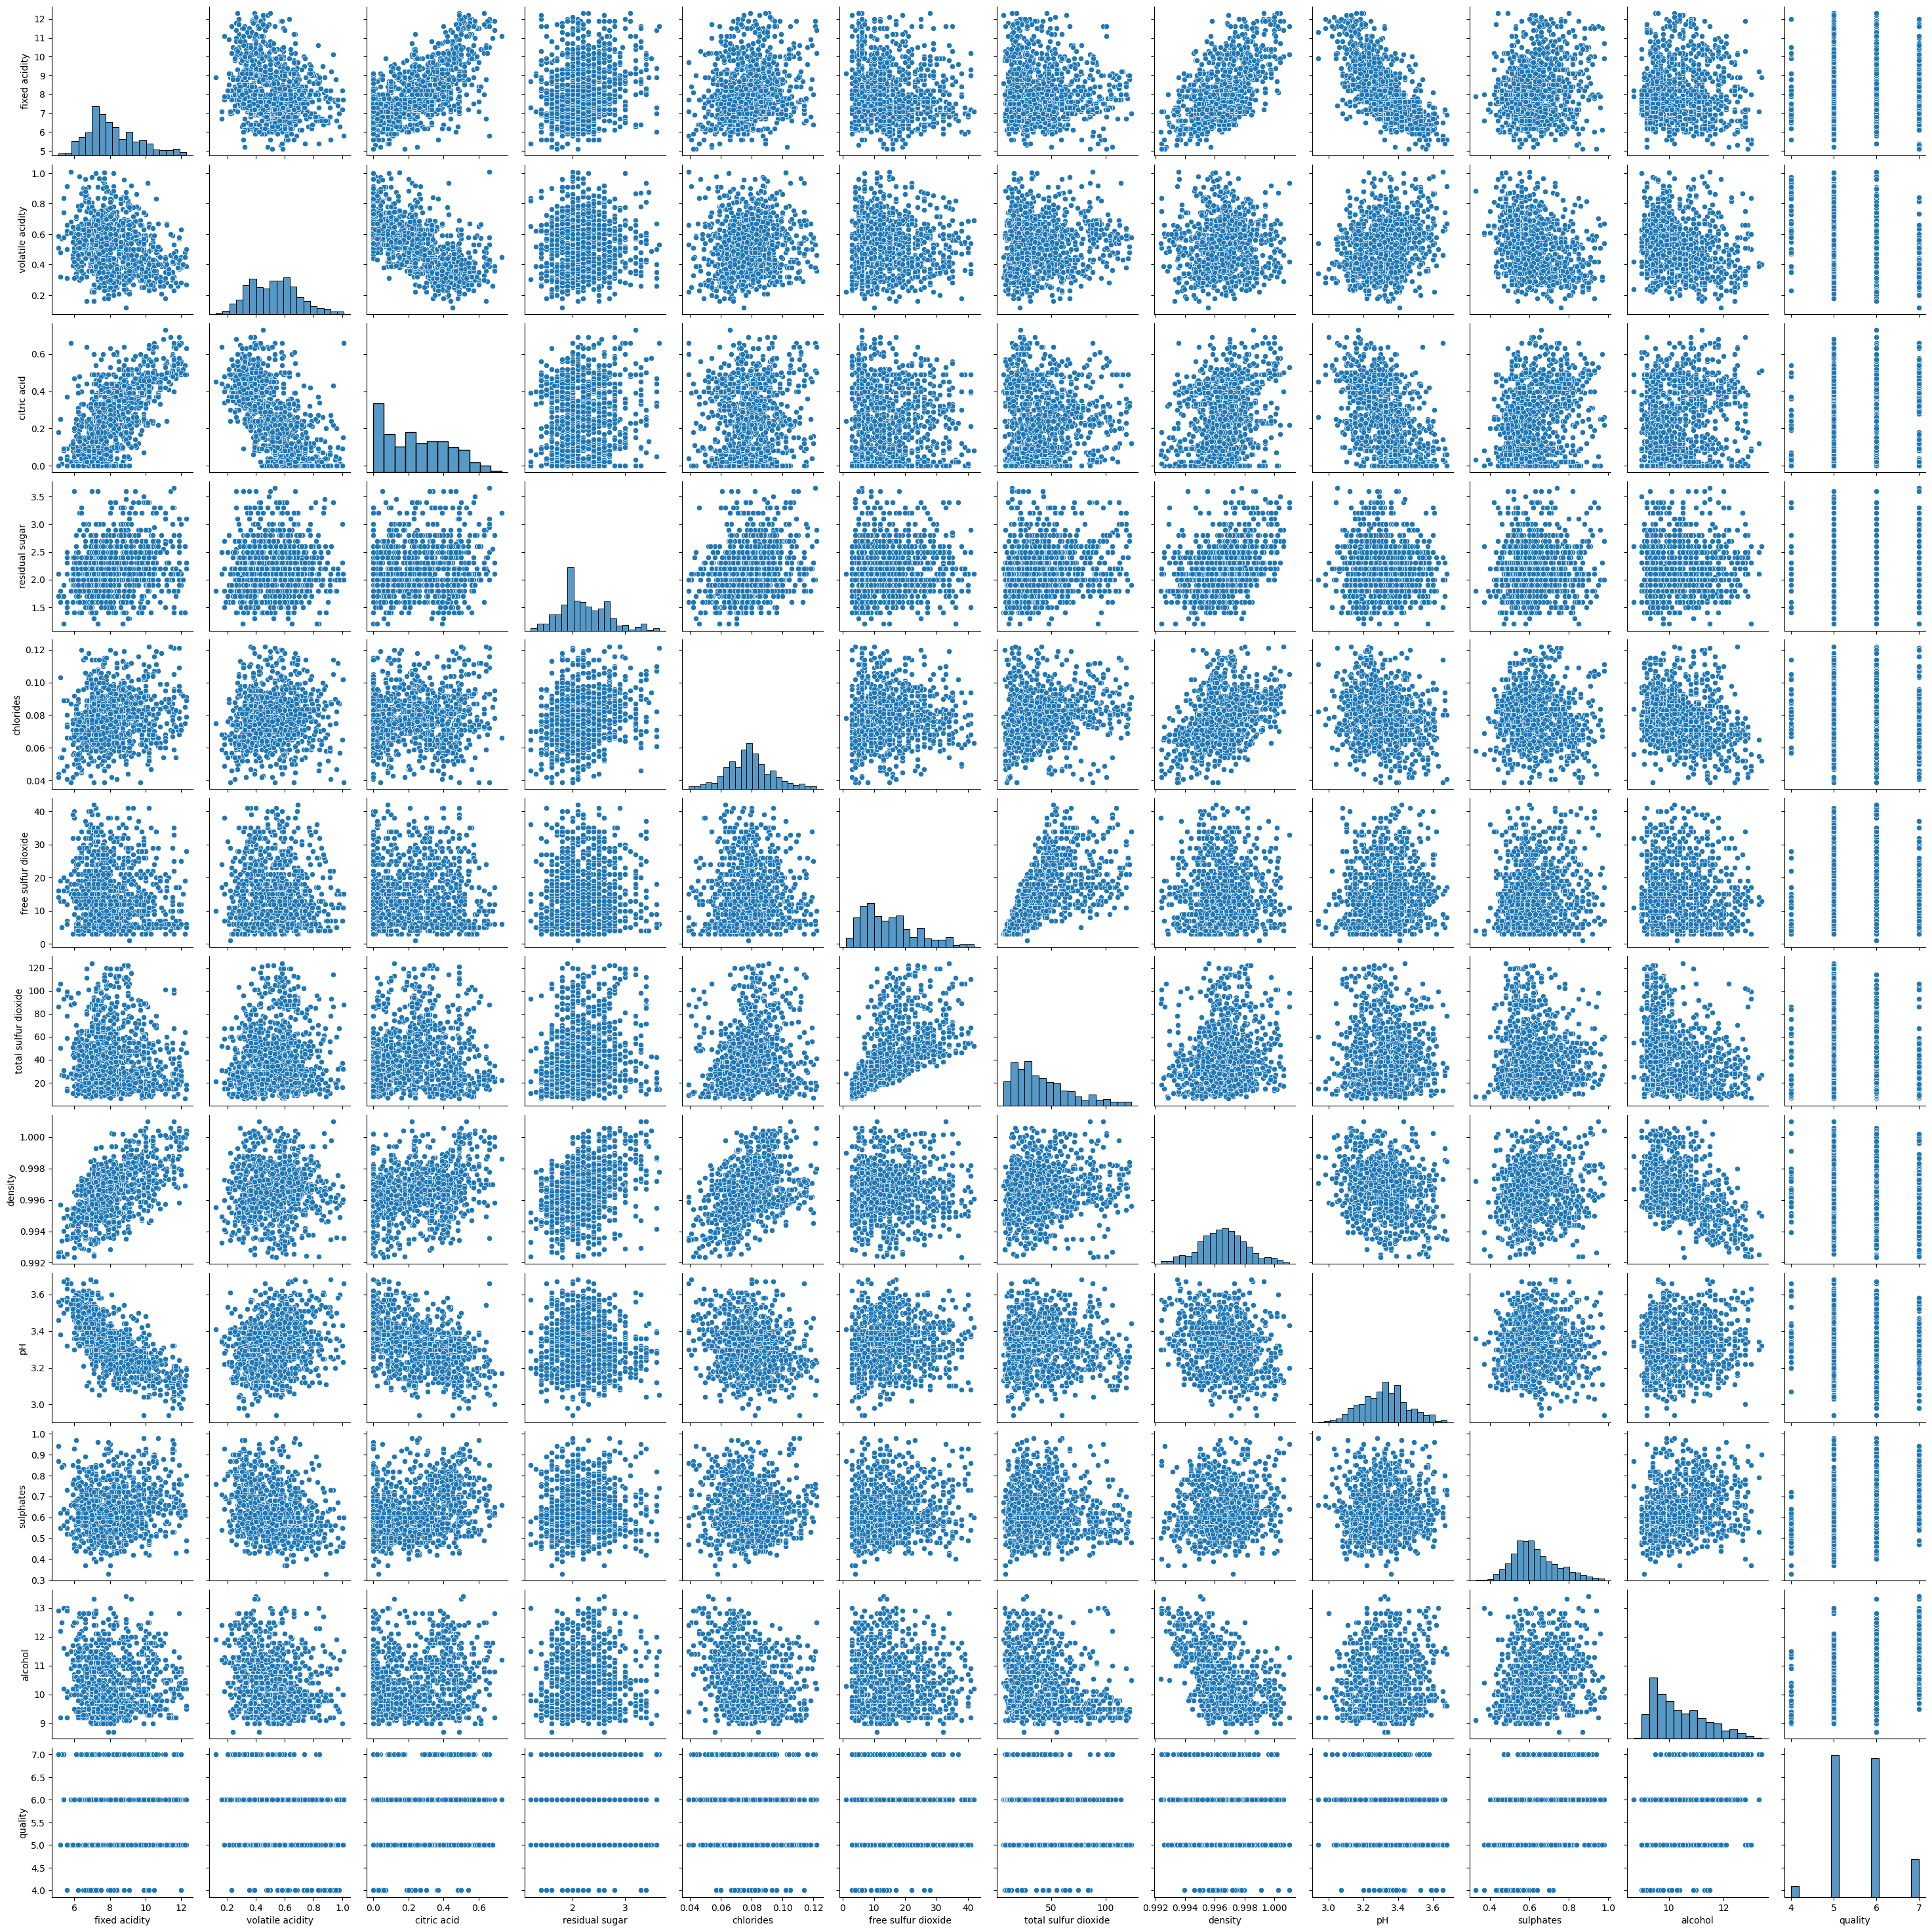

In [33]:
sns.pairplot(df)